## 📌 Libraries Used

This project uses the following Python libraries:

- **ast** — converts skills stored as strings into Python lists for analysis  
- **pandas** — handles data cleaning, manipulation, and analysis  
- **seaborn / matplotlib** — used to create visualizations and charts  
- **datasets (HuggingFace)** — loads the dataset directly from HuggingFace using `load_dataset()`


In [303]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

## 📥 Loading the Dataset

In this step, I load the **data_jobs** dataset directly from HuggingFace using `load_dataset()`.  
The dataset is then converted into a Pandas DataFrame to make it easier to clean, explore, and visualize throughout the analysis.


In [304]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

## 📌 Dataset Inspection & Cleanup

Before starting the analysis, I first inspect the dataset structure using `df.info()`.  
This provides a quick overview of:

- Total number of rows and columns  
- Data types of each column  
- Missing values across the dataset  

After understanding the dataset format, I apply essential cleanup steps:

1. **Convert `job_posted_date` to datetime format**  
   This makes it possible to perform time-based analysis such as monthly or yearly trends.

2. **Convert `job_skills` into Python list format**  
   The skills column is stored as a string representation of a list, so I use `ast.literal_eval()` to transform it into real lists for accurate skill analysis.


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [306]:
#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

# Exploratory Data Analysis for all Data Roles


## 📌 Roles to Explore

To understand which job roles appear most frequently in the dataset, I first calculate the number of job postings for each role using `value_counts()`.

I then visualize the results using a horizontal bar chart.  
This provides a quick overview of the most common data job titles and helps identify which roles are most relevant to focus on during the rest of the analysis.

✅ **Why this matters:**  
By identifying the most frequently posted roles, I can prioritize exploring the job market around positions that employers are actively hiring for.


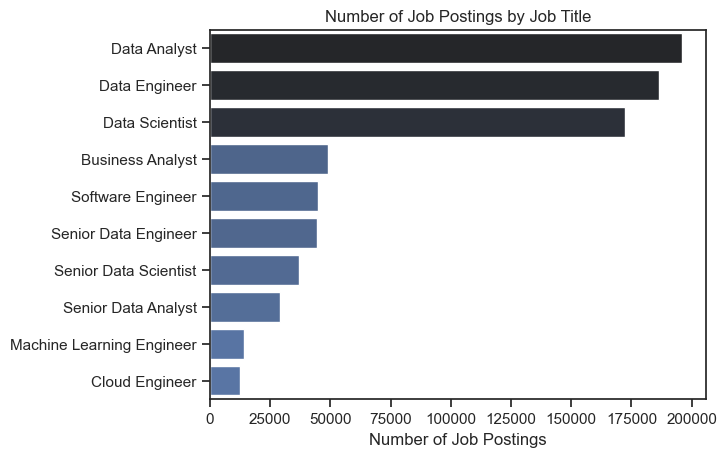

In [308]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style = 'ticks')              #defining the theme
sns.barplot(data = df_plot,                 #plotting the barplot
            x = 'count',                    #x-axis
            y = 'job_title_short',          #y-axis
            hue = 'count',                 
            palette = 'dark:b_r',           #color palette
            legend=False                    #removing the legend
            )

plt.title('Number of Job Postings by Job Title')
plt.xlabel('Number of Job Postings')
plt.ylabel('')

plt.show()

### Insight
- Data Analyst is the most in-demand role, leading all job titles in the number of postings  
- Data Engineer and Data Scientist roles also show strong demand, reflecting the importance of advanced data and engineering skills  
- Senior and specialized roles appear less frequently, indicating fewer openings but potentially higher experience requirements  


## 🌍 Countries to Explore

To understand where data job opportunities are most concentrated, I analyzed the geographic distribution of job postings by country.

I used `value_counts()` to calculate how many job listings appear in each country, then selected the **top 19 countries** with the highest number of postings. A horizontal bar chart is used to clearly compare hiring volume across regions.

✅ **Why this matters:**  
This helps identify the strongest job markets globally and provides context for comparing demand across different locations.


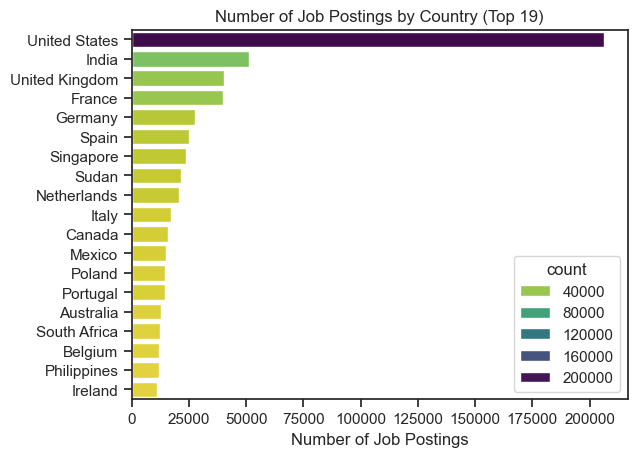

In [309]:
df_plot_countries = df['job_country'].value_counts().head(19).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot_countries,
            x = 'count',
            y = 'job_country',
            hue = 'count',
            palette='viridis_r'
            
            )

plt.title('Number of Job Postings by Country (Top 19)')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()


### Insight
- The United States dominates the job market, accounting for the majority of Data Analyst job postings  
- India and the United Kingdom follow at a distance, showing strong but significantly smaller demand  
- Data Analyst opportunities are concentrated in a few key countries, with comparatively limited postings elsewhere  


## 🏢 Companies to Explore

To identify which employers are posting the most data-related job opportunities, I analyzed the distribution of job postings by company.

I used `value_counts()` on the `company_name` column to calculate posting frequency and selected the **top 19 companies** with the highest number of job listings. The results are visualized using a horizontal bar chart, making it easy to compare which organizations are most active in hiring.

✅ **Why this matters:**  
This analysis highlights the companies with the strongest hiring presence in the dataset and helps identify potential target employers for job seekers.


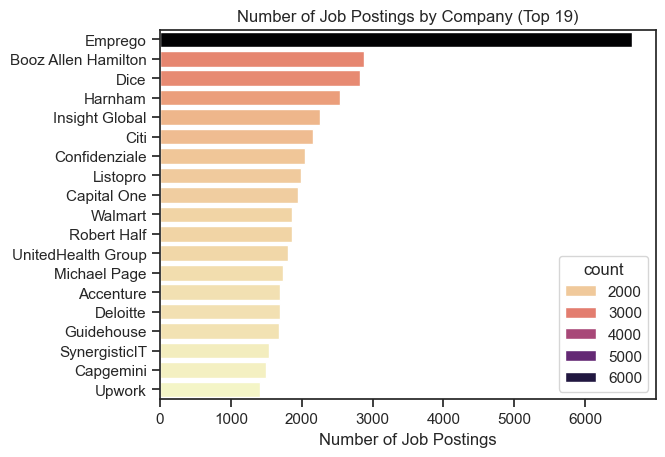

In [310]:
df_plot_com = df['company_name'].value_counts().head(19).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot_com,
            x = 'count',
            y = 'company_name',
            hue = 'count',
            palette='magma_r'
            
            )
plt.title('Number of Job Postings by Company (Top 19)')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()


### Insight
- Emprego posts the highest number of Data Analyst job openings among the listed companies  
- Consulting, staffing, and recruitment firms dominate the top employers, reflecting strong demand from service-oriented organizations  
- Large enterprises and global consulting firms consistently appear among the top hiring companies, indicating sustained demand for data analytics talent  


## 💼 Job Opportunities (Work From Home, Degree Requirements, Benefits)

In this section, I explore job posting features that can directly impact the quality and accessibility of opportunities for candidates.

Specifically, I analyze three key attributes:

- **Work From Home (`job_work_from_home`)** — identifies remote-friendly roles  
- **No Degree Mention (`job_no_degree_mention`)** — highlights jobs that do not explicitly require a degree  
- **Health Insurance (`job_health_insurance`)** — checks how often job postings include benefits  

To make comparison easy, I visualize each category using pie charts displayed side by side.  
This provides a quick view of how common these job benefits and requirements are across job postings.

✅ **Why this matters:**  
These factors help job seekers understand which roles offer more flexibility, require fewer formal credentials, and provide stronger employee benefits.


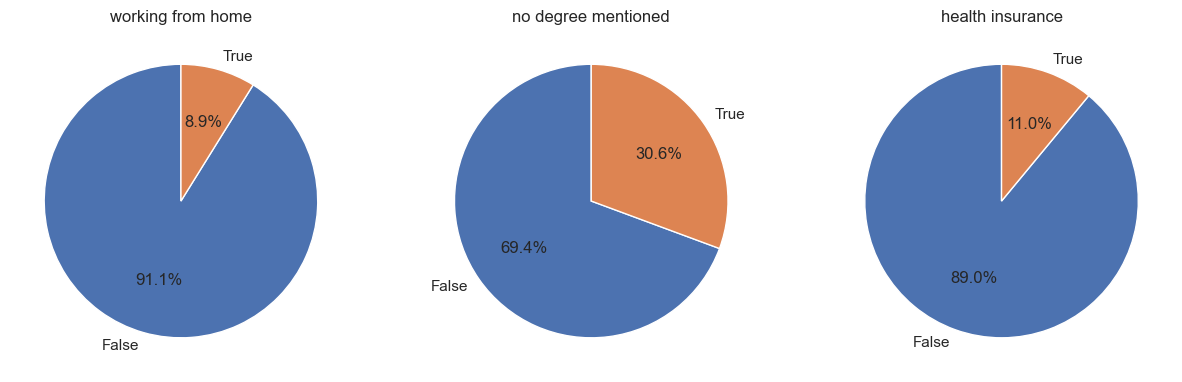

In [311]:
job_opportunities = {
    'job_work_from_home': 'working from home',
    'job_no_degree_mention': 'no degree mentioned',
    'job_health_insurance': 'health insurance'
}

# Creating subplots
fig, ax = plt.subplots(1,3, figsize = (15,5))  

# Plotting pie charts
for i, (column, title) in enumerate(job_opportunities.items()):
    ax[i].pie(df[column].value_counts(), labels = [False, True], startangle = 90, autopct = '%1.1f%%')
    ax[i].set_title(title)

plt.show()

### Insight
- Fully remote Data Analyst roles remain limited, with the majority of positions requiring on-site or hybrid work  
- Around one-third of job postings do not explicitly mention a degree requirement, indicating alternative entry paths into data analytics  
- Health insurance is included in a relatively small share of postings, suggesting benefits are not always clearly stated in job descriptions  


## Filter for US Data Analyst roles

In [312]:
df_US_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()


## 📍 Locations to Explore (U.S. Data Analyst Roles)

To better understand where Data Analyst opportunities are most concentrated in the United States, I analyzed job postings by **job location**.

I calculated the frequency of each location using `value_counts()` and selected the **top 19 locations** with the highest number of postings. The results are displayed in a horizontal bar chart to make location-based comparisons easier.

✅ **Why this matters:**  
This visualization highlights the cities and regions with the strongest hiring activity, helping identify where demand for Data Analysts is highest and where job seekers may find more opportunities.


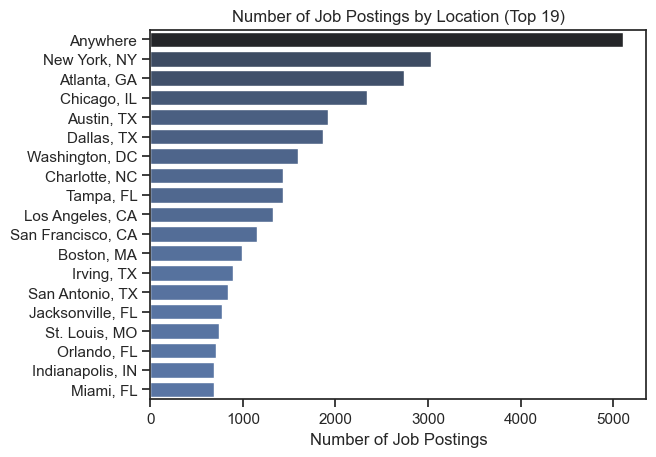

In [313]:
df_loca = df_US_DA['job_location'].value_counts().head(19).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_loca,
            x = 'count',
            y = 'job_location',
            hue = 'count',
            palette = 'dark:b_r',
            legend=False
            )

plt.title('Number of Job Postings by Location (Top 19)')
plt.xlabel('Number of Job Postings')        
plt.ylabel('')
plt.show()


### Insight
- Remote-friendly positions (“Anywhere”) account for the highest number of job postings, highlighting strong demand for flexible work options  
- Major metropolitan areas such as New York, Atlanta, and Chicago remain key hiring hubs for Data Analyst roles  
- Job opportunities are concentrated in large cities and tech-focused regions, with fewer postings in smaller markets  


## 💼 Job Opportunities (U.S. Data Analyst Roles)

In this section, I analyze key job features that influence the attractiveness and accessibility of Data Analyst roles in the United States.

I focus on three important job attributes:

- **Remote Work Availability** (`job_work_from_home`)  
- **Degree Requirement Not Mentioned** (`job_no_degree_mention`)  
- **Health Insurance Provided** (`job_health_insurance`)  

To clearly compare these categories, I visualize each variable using pie charts placed side-by-side.  
This provides an easy way to understand how common these opportunities and benefits are across U.S. Data Analyst job postings.

✅ **Why this matters:**  
These insights help job seekers identify roles that offer flexibility (remote work)



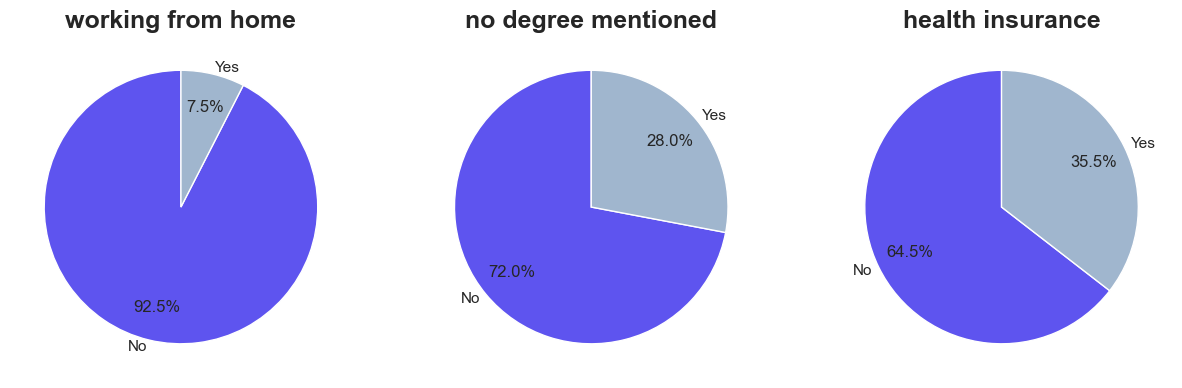

In [314]:
job_opportunities = {
    'job_work_from_home': 'working from home',
    'job_no_degree_mention': 'no degree mentioned',
    'job_health_insurance': 'health insurance'
}

fig, ax = plt.subplots(1,3, figsize = (15,5))
for i, (column, title) in enumerate(job_opportunities.items()):
    ax[i].pie(df_US_DA[column].value_counts(),
                labels = ['No', 'Yes'],
                startangle = 90,
                autopct = '%1.1f%%',
                colors = ["#5E54EF", "#a0b6ce"],
                pctdistance=0.75,
                labeldistance=1.05,
                         )
    
    ax[i].set_title(title, fontsize=18,  fontweight="bold")
plt.show()

### Insight
- Fully remote Data Analyst roles are relatively limited, with most job postings requiring on-site or hybrid work  
- Nearly one-third of postings do not explicitly require a degree, suggesting alternative pathways into data analytics  
- Health insurance is mentioned in a significant portion of job listings, indicating it is a common but not universal benefit  


## 🏢 Companies to Explore (Top 10 Employers)

To identify which employers are most actively hiring for **Data Analyst roles in the United States**, I analyzed the frequency of job postings by company.

Using `value_counts()` on the `company_name` column, I selected the **top 10 companies** with the highest number of job listings and visualized the results using a horizontal bar chart.

✅ **Why this matters:**  
This highlights the organizations with the strongest hiring presence for U.S. Data Analyst positions and helps job seekers identify potential target employers for applications and research.


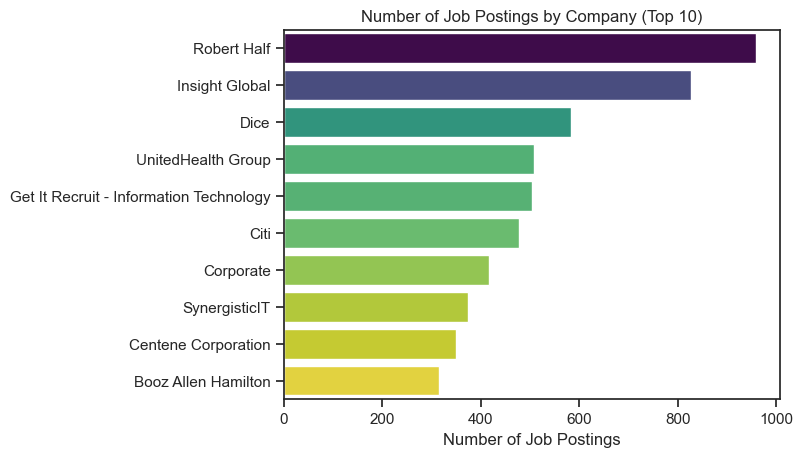

In [315]:
df_compa = df_US_DA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_compa,
            x = 'count',
            y = 'company_name',
            hue = 'count',
            palette = 'viridis_r',
            legend=False
            )

plt.title('Number of Job Postings by Company (Top 10)') 
plt.xlabel('Number of Job Postings')
plt.ylabel('')

plt.show()



### Insight
- Robert Half and Insight Global post the highest number of Data Analyst job openings  
- Large consulting, staffing, and enterprise organizations dominate the hiring landscape  
- Job opportunities are concentrated among a small number of major employers, indicating strong demand from large-scale organizations  


## What are the most demanded skills for the top 3 most popular data roles?

### Methodology

1. **Clean and format the skills column**  
   Convert the skills data into a structured list format for analysis.

2. **Compute skill frequency by job role**  
   Group postings by `job_title_short` and count skill occurrences.

3. **Calculate skill demand percentage**  
   Convert counts into percentages to compare roles fairly.

4. **Visualize the results**  
   Plot the top skills for each of the three most common job roles.



#

## 🧹 Clean and Structure the Skills Column

To analyze skill demand accurately, I first focus on job postings in the **United States** and prepare the skills data for counting.

### Steps performed:
1. **Filter U.S. job postings**  
   This ensures the analysis is consistent within one job market.

2. **Explode the `job_skills` column**  
   Since each job posting contains multiple skills stored as a list, I use `.explode()` to transform the dataset so that:
   - each row represents **one job posting + one skill**
   - skills can be counted and grouped correctly

✅ This step creates a clean structure that makes it possible to calculate skill frequency and demand percentages by job role.


In [316]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US_exploded = df_US.explode('job_skills')
df_US_exploded[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


## 🔢 Count Skills per Job Title

After restructuring the dataset so that each row represents a single skill, I calculate how often each skill appears for every job role.

### What this step does:
- Groups the data by:
  - `job_title_short` (job role)
  - `job_skills` (individual skill)
- Counts how many times each skill appears within each role using `.size()`

✅ The result is a table showing the **skill frequency (`skill_count`)** for each job title, which is essential for measuring demand and later calculating skill percentages.


In [317]:
df_US_exploded_gr = df_US_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name = 'skill_count').sort_values(by = 'skill_count', ascending=False)

df_US_exploded_gr

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1350,Senior Data Engineer,elixir,1
1819,Software Engineer,sass,1
487,Data Analyst,theano,1
1847,Software Engineer,theano,1


## ⭐ Identify the Top 3 Most Common Roles

To focus the analysis on the most relevant job categories, I first identify the **three most frequently posted data roles** in the U.S. dataset.

I use `value_counts()` on the `job_title_short` column, then select the top 3 roles.  
These roles will be used in the next step to compare which skills employers request most often.


In [318]:
top3_roles = df_US['job_title_short'].value_counts().head(3).index
top3_roles = top3_roles.to_list()
top3_roles

['Data Analyst', 'Data Scientist', 'Data Engineer']

## 📊 Visualize Skill Demand Across the Top 3 Roles

After computing skill frequency per job title, I visualize the **top skills for each of the three most common roles**.

### What the visualization shows:
- Each subplot represents **one job role**
- The bar chart displays the **top skills ranked by frequency**
- This makes it easy to compare how skill requirements differ across roles

✅ **Why this matters:**  
Different roles emphasize different tools and technologies. Visualizing skill demand helps highlight which skills are essential depending on the career path (Data Analyst vs Data Scientist vs Data Engineer).


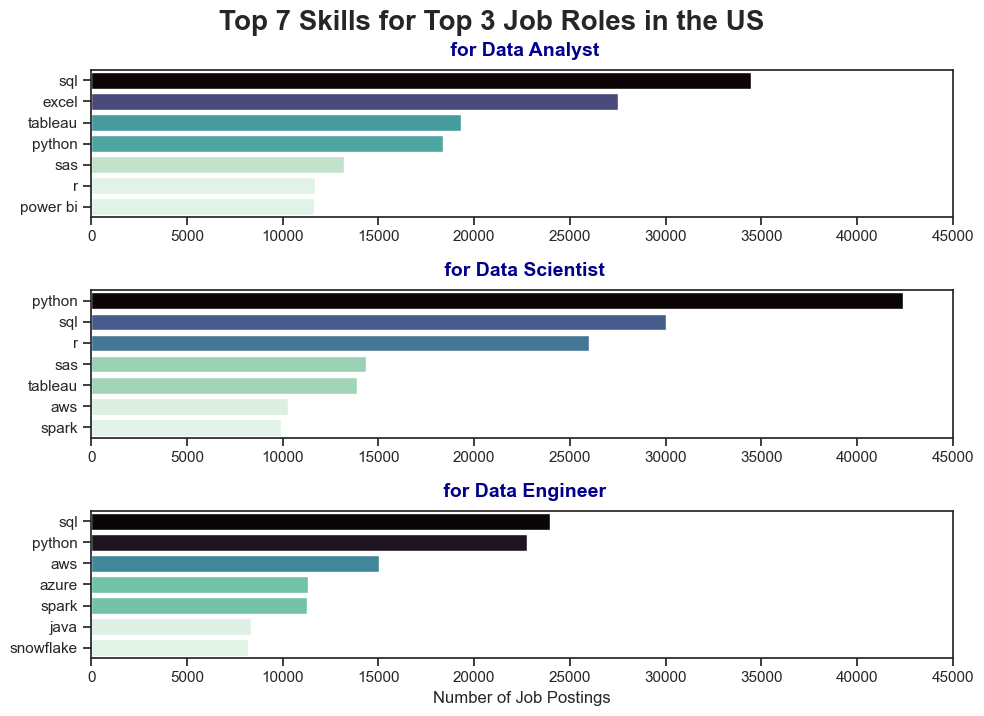

In [319]:
# Plot Skill Counts
fig , ax = plt.subplots(3, 1, figsize = (10,7))  

# Plotting bar plots for top 3 roles
for i, job_t in enumerate(top3_roles):
    sns.set_theme(style='ticks')
    df_US_exploded_gr_plot = df_US_exploded_gr[df_US_exploded_gr['job_title_short'] == job_t].head(7)  # 7 top skills
    sns.barplot(data = df_US_exploded_gr_plot,
                x = 'skill_count',
                y = 'job_skills',
                ax = ax[i],
                hue = 'skill_count',   
                palette = 'mako_r',
                legend=False
                )
    ax[i].set_title(f' for {job_t}',           #setting title
                     fontsize=14,
                     pad = 10,                 #spacing between title and plot
                     fontweight="bold",        #bold font
                     color="darkblue",
                     loc="center",
                     ) 
    
    ax[i].set_xlabel('')

    if i == 2:
      ax[i].set_xlabel('Number of Job Postings') # Adding xlabel only to the last plot

    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 45000) 

plt.tight_layout()
plt.suptitle('Top 7 Skills for Top 3 Job Roles in the US', y=1.02, fontsize=20, fontweight="bold")
plt.show()
    

## 📌 Convert Skill Counts to Percentages

Raw skill counts are useful, but they can be misleading when comparing job roles because some roles have **more job postings than others**.

To make the comparison fair, I convert skill counts into **percentages** by calculating:

**Skill Demand % = (skill_count ÷ total job postings for that role) × 100**

### Steps performed:
1. **Calculate total job postings per job title**  
   I count how many job listings exist for each role using `value_counts()`.

2. **Merge totals into the skill count table**  
   I combine the overall job totals with the skill-level counts using `pd.merge()`.

✅ This creates a standardized metric that allows me to compare skill demand across different roles, even when the number of postings per role varies.


In [320]:
df_US_exploded_gr

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1350,Senior Data Engineer,elixir,1
1819,Software Engineer,sass,1
487,Data Analyst,theano,1
1847,Software Engineer,theano,1


#### Merging total job counts

In [321]:
jobs_count = df_US['job_title_short'].value_counts().reset_index(name = 'jobs_total')
jobs_prc = pd.merge(df_US_exploded_gr, jobs_count, on = 'job_title_short') 

jobs_prc


,job_title_short,job_skills,skill_count,jobs_total
0,Data Scientist,python,42379,58830
1,Data Analyst,sql,34452,67816
2,Data Scientist,sql,30034,58830
3,Data Analyst,excel,27519,67816
4,Data Scientist,r,26022,58830
...,...,...,...,...
1865,Senior Data Engineer,elixir,1,9289
1866,Software Engineer,sass,1,1814
1867,Data Analyst,theano,1,67816
1868,Software Engineer,theano,1,1814


In [322]:
jobs_prc['skill_percent'] = (jobs_prc['skill_count'] / jobs_prc['jobs_total']) * 100
jobs_prc

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,elixir,1,9289,0.010765
1866,Software Engineer,sass,1,1814,0.055127
1867,Data Analyst,theano,1,67816,0.001475
1868,Software Engineer,theano,1,1814,0.055127


## 📊 Visualize Skill Demand by Percentage (Top 3 Roles)

After converting skill counts into percentages, I visualize the **top skills for each of the three most common data roles** using a standardized metric.

### What this chart shows:
- Each subplot represents a different job role
- Skills are ranked by **percentage of job postings** that mention them
- Percentage labels are added to improve readability and interpretation

✅ **Why this matters:**  
Using percentages allows for a fair comparison between roles, even if one role has significantly more job postings than another. This makes it easier to identify which skills are most essential for each role based on employer demand.


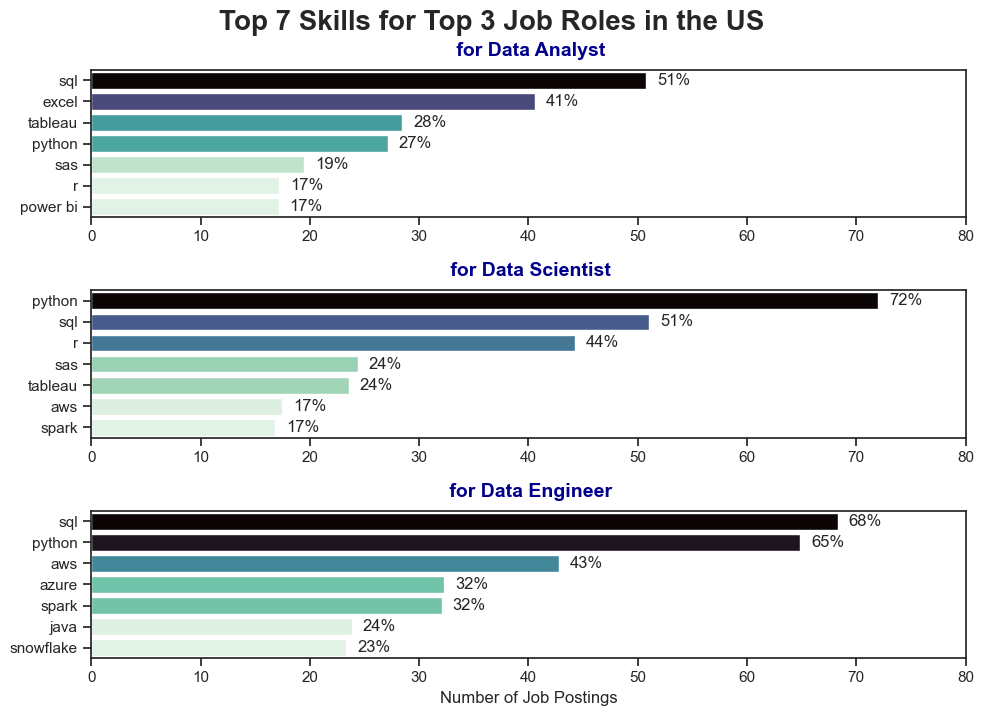

In [323]:
fig , ax = plt.subplots(3, 1, figsize = (10,7))  


for i, job_t in enumerate(top3_roles):
    sns.set_theme(style='ticks')
    df_US_exploded_gr_plot = jobs_prc[jobs_prc['job_title_short'] == job_t].head(7)  # changing to jobs_prc
    sns.barplot(data = df_US_exploded_gr_plot,
                x = 'skill_percent',                                                 #x-axis changed to skill_percent
                y = 'job_skills',
                ax = ax[i],
                hue = 'skill_count',   
                palette = 'mako_r',
                legend=False
                )
    ax[i].set_title(f' for {job_t}',           
                     fontsize=14,
                     pad = 10,                 
                     fontweight="bold",        
                     color="darkblue",
                     loc="center",
                     ) 
    
    for n, m in enumerate(df_US_exploded_gr_plot['skill_percent']):                  # Adding percentage labels
       ax[i].text(m + 1, n, f'{m:.0f}%', va = 'center')
    
    ax[i].set_xlabel('')

    if i == 2:
      ax[i].set_xlabel('Number of Job Postings') 

    ax[i].set_ylabel('') 
    ax[i].set_xlim(0, 80)                                                            #setting x-axis limit
    
plt.tight_layout()
plt.suptitle('Top 7 Skills for Top 3 Job Roles in the US', y=1.02, fontsize=20, fontweight="bold")
plt.show()
    

### Insight
- **Data Analysts** are primarily expected to master foundational tools, with SQL and Excel appearing in the majority of job postings  
- **Data Scientists** show a strong emphasis on programming and statistical skills, particularly Python, SQL, and R  
- **Data Engineers** require more specialized technical expertise, with high demand for SQL, Python, and cloud technologies such as AWS and Azure  
- Python is a common skill across all three roles, highlighting its versatility in the data field  


## How are in-demand skills trending for Data Analysts?

### Methodology
1. Group Data Analyst job postings by month and aggregate skill counts  
2. Convert skill counts into percentages of total monthly postings to normalize comparisons  
3. Visualize monthly trends to track changes in skill demand over time  


## 🗓️ Prepare Data for Monthly Skill Trend Analysis

To analyze how skill demand changes over time for **U.S. Data Analyst roles**, I first prepare the dataset for monthly aggregation.

### Steps performed:
1. **Extract the month from the job posting date**  
   I create a new column (`job_posted_month`) from `job_posted_date` to enable month-by-month analysis.

2. **Explode the skills column**  
   Since each job posting contains multiple skills, I use `.explode()` on `job_skills` so that each row represents a single skill occurrence.

✅ This structured format allows skills to be grouped and analyzed accurately by month, making it possible to track trends in skill demand over time.


In [325]:
df_US_DA['job_posted_month'] = df_US_DA['job_posted_date'].dt.month   #extracting month from job_posted_date

df_US_DA_skills = df_US_DA.explode('job_skills')                     #exploding job_skills

df_US_DA_skills


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",excel,"{'analyst_tools': ['excel'], 'programming': ['...",7
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ...",1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ...",1


## 📊 Reshape and Organize Skill Data for Trend Analysis

To analyze how Data Analyst skill demand changes over time, I restructure the dataset into a monthly skill matrix.

### Steps performed:

1. **Create a pivot table**
   - Rows represent the **month a job was posted**
   - Columns represent individual **skills**
   - Cell values show how many times each skill appears in a given month
   - Missing values are filled with `0` to avoid gaps

2. **Rank skills by overall demand**
   - Compute total occurrences of each skill across all months
   - Sort skills from most to least demanded
   - Remove the temporary total row after sorting
3. **Format the month labels**
   - Convert numeric months into readable month names (e.g., Jan, Feb)
   - This improves clarity in later visualizations


✅ This transformation produces a clean, well-structured table that makes it easy to track and visualize **monthly trends in skill demand** for Data Analysts.


## *Create a pivot table*

In [333]:
df_US_DA_skills_pivot = df_US_DA_skills.pivot_table(index = 'job_posted_month',
                            columns = 'job_skills',
                            aggfunc = 'size',
                            fill_value=0                    #filling missing values with 0
                            )

df_US_DA_skills_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


## *Rank skills by overall demand*
✅ This step guarantees that trend visualizations focus on the most important and widely requested skills.


In [327]:
df_US_DA_skills_pivot.loc['Total'] = df_US_DA_skills_pivot.sum()        #computing total occurrences of each skill

df_US_DA_skills_pivot = df_US_DA_skills_pivot[df_US_DA_skills_pivot.loc['Total'].sort_values(ascending=False).index]

df_US_DA_skills_pivot.drop('Total', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_7844\3320979980.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_DA_skills_pivot.drop('Total', inplace=True)


## *Format the month labels*

In [328]:
df_US_DA_skills_pivot  #before formatting month labels

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [329]:
df_US_DA_skills_pivot = df_US_DA_skills_pivot.reset_index()  

df_US_DA_skills_pivot['job_posted_month'] = df_US_DA_skills_pivot['job_posted_month'].apply(lambda x : pd.to_datetime(x, format = '%m').strftime('%b'))
df_US_DA_skills_pivot = df_US_DA_skills_pivot.set_index('job_posted_month')

df_US_DA_skills_pivot #after formatting month labels

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
Feb,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
Mar,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
Apr,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
May,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
Jun,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
Jul,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
Aug,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
Sep,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


## 📈 Monthly Trends in Top In-Demand Skills for Data Analysts

To understand how demand for key Data Analyst skills evolves over time, I visualize the **top five most in-demand skills** on a monthly basis.

The line chart shows:
- Each line represents a **skill**
- The x-axis shows the **month**
- The y-axis shows the **number of job postings** mentioning that skill

✅ **Why this matters:**  
This visualization highlights which skills maintain consistent demand, which are growing, and which may be declining over time. It helps identify both stable core skills and emerging trends in the Data Analyst job market.


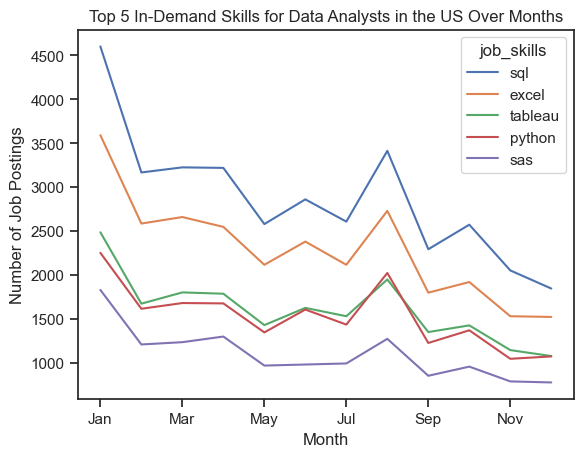

In [330]:
df_US_DA_skills_pivot.iloc[:, :5].plot(kind = 'line')         #plotting line graph for top 5 skills

plt.title('Top 5 In-Demand Skills for Data Analysts in the US Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')

plt.show()

### Insight
- SQL consistently leads in job postings across all months  
- Excel remains the second most in-demand skill but shows a gradual decline toward the end of the year  
- Python and Tableau follow similar demand patterns with moderate fluctuations  
- SAS has the lowest demand and remains relatively stable throughout the year  


## 📐 Normalize Skill Demand by Percentage

To accurately compare skill demand across months, I convert raw skill counts into **percentages of total job postings** for each month.

### Steps performed:
1. **Calculate total job postings per month**  
   I group Data Analyst job postings by `job_posted_month` to obtain the total number of postings in each month.

2. **Convert skill counts to percentages**  
   Each skill count is divided by the total monthly postings (scaled by 100), producing a normalized percentage value.

✅ This normalization ensures that variations in overall hiring volume do not distort trend comparisons, allowing for a clearer view of true changes in skill demand over time.


In [331]:
s_total = df_US_DA.groupby('job_posted_month').size().values        #total job postings per month

df_US_DA_skills_pivot_prcnt = df_US_DA_skills_pivot.iloc[:12].div(s_total/100, axis=0)         #percentage representation

df_US_DA_skills_pivot_prcnt

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028,0.000000,0.000000,0.000000,0.000000
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.000000,0.000000,0.017596,0.000000,0.000000,0.017596,0.017596,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 📈 Monthly Percentage Trends of Top 5 Data Analyst Skills (U.S.)

In this final step, I visualize the **monthly percentage trends** of the top five most in-demand Data Analyst skills in the United States.

### What this visualization shows:
- Each line represents a **skill**
- Values are shown as a **percentage of total monthly job postings**
- Line labels are placed directly at the end of each line for improved readability

### Design choices:
- Dashed lines are removed for clarity
- A consistent color palette is used to distinguish skills
- The y-axis is formatted as a percentage to reflect normalized values

✅ **Why this matters:**  
This chart clearly illustrates which skills maintain stable demand, which are increasing in importance, and which show declining trends over time—helping Data Analysts focus on skills that remain valuable in the evolving job market.


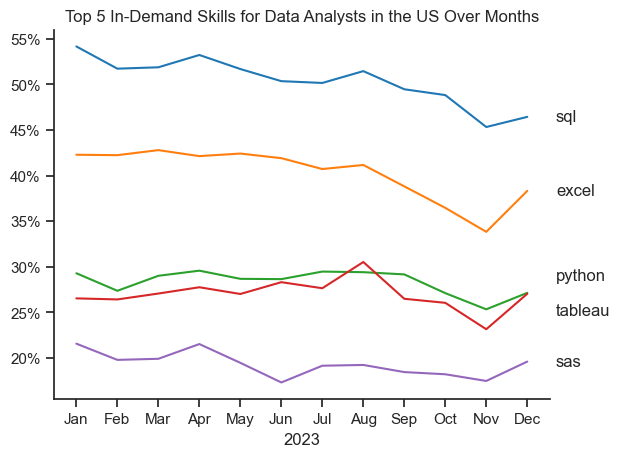

In [332]:
from matplotlib.ticker import PercentFormatter

sns.set_theme(style='ticks')
sns.lineplot(data=df_US_DA_skills_pivot_prcnt.iloc[:,:5],     
             dashes = False,                                  #removing dashes
             legend=False,
             palette='tab10',                                 #color palette
              )
sns.despine()

plt.title('Top 5 In-Demand Skills for Data Analysts in the US Over Months')
plt.xlabel('2023')
plt.ylabel('')

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))                   


offsets = {"python": 2, "tableau": -2.}  # ajuste si besoin

for i in range(5):
    skill = df_US_DA_skills_pivot_prcnt.columns[i]
    y = df_US_DA_skills_pivot_prcnt.iloc[-1, i] + offsets.get(skill, 0)   #ajustement

    plt.text(11.7, y, skill, va="center")                                 #ajout des labels de fin de ligne


plt.show()

### Insight
- SQL remains the most consistently in-demand skill throughout the year  
- Excel shows moderate seasonal variation but stays highly requested  
- Python and Tableau maintain steady demand with small fluctuations  
- SAS remains the least in-demand skill among the top five  


# How well do jobs and skills pay for Data Analysts?

## Methodology
1. **Evaluate median salary for top 6 data jobs**
2. **Find median salary per skill for Data Analysts**
3. **Visualize for highest paying skills and most demanded skills**

## 💰 Prepare Salary Data for Job Title Comparison

Before analyzing salary distributions, I prepare the dataset to ensure accurate and meaningful comparisons.

### Steps performed:
1. **Remove missing salary values**  
   Job postings without an annual salary are excluded to avoid skewing results.

2. **Identify the most common job titles**  
   I select the top job titles based on posting frequency to focus the analysis on roles with sufficient data.

3. **Filter the dataset to selected roles**  
   Only job postings belonging to the selected job titles are retained.

4. **Order roles by median salary**  
   Job titles are sorted by median annual salary to improve clarity in salary visualizations.

✅ This preparation ensures that salary comparisons are based on reliable data and representative job roles.


In [ ]:
df_US = df_US.dropna(subset= 'salary_year_avg')   #removing rows with missing salary_year_avg

# Getting top 6 job titles
top7_jobs_titles = df_US['job_title_short'].value_counts().head(6).index.to_list()

In [ ]:
df_US_top7 = df_US[df_US['job_title_short'].isin(top7_jobs_titles)] #filtering to keep only top 6 job titles

# ordering job titles by median salary
top7_jobs_order = df_US_top7.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index 

## 📦 Salary Distribution of Top Job Titles in the U.S.

This boxplot visualizes the **annual salary distribution** for the **top 7 most common data-related job titles** in the United States.

### What the chart shows:
- Each box represents the salary distribution for a job title
- The median salary highlights typical compensation
- Outliers indicate exceptionally high-paying roles

### Why this matters:
This visualization makes it easy to compare both **typical pay** and **salary variability** across different data roles, highlighting how compensation increases with seniority and specialization.


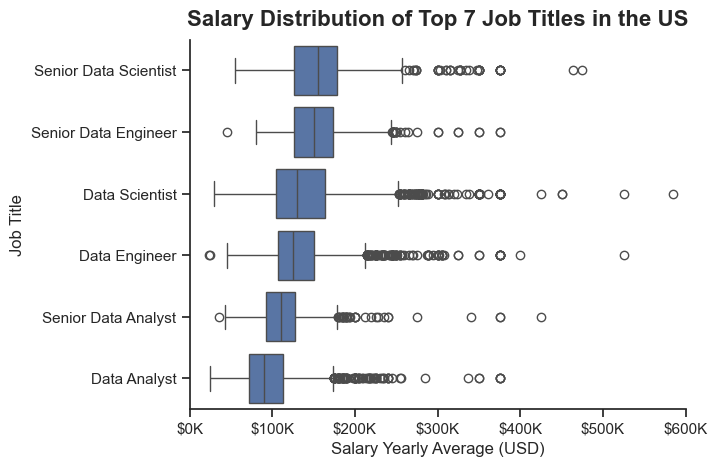

In [337]:
sns.set_style('ticks')
sns.boxplot(data = df_US_top7,
            y ='job_title_short',            
            x = 'salary_year_avg',
            order = top7_jobs_order                 #ordering job titles by median salary
            )
sns.despine()
plt.title('Salary Distribution of Top 7 Job Titles in the US',
          fontsize=16,
          pad=10,
          fontweight="bold"
          )
plt.xlabel('Salary Yearly Average (USD)')
plt.ylabel('Job Title')
plt.xlim(0, 600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))        #formatting x-axis in K USD

plt.show()

### Insight
- Salaries increase clearly with seniority across all roles  
- Senior Data Scientist and Senior Data Engineer positions have the highest median pay and widest salary ranges  
- Data Analyst and Business Analyst roles show more consistent and lower salary distributions compared to senior and technical roles  


# Investigate Median Salary Vs Skill for Data Analysts

## 🎯 Filter and Prepare U.S. Data Analyst Data

To focus the analysis on **Data Analyst roles in the United States**, I filter and clean the dataset before examining salary and skill relationships.

### Steps performed:
1. **Filter for U.S. Data Analyst roles**  
   Only job postings with the title *Data Analyst* and located in the United States are retained.

2. **Remove missing salary values**  
   Rows without an annual salary are excluded to ensure accurate salary-based analysis.

3. **Explode the skills column**  
   The `job_skills` column is exploded so that each row represents a single skill, enabling precise skill-level salary analysis.

✅ This preparation ensures that both salary and skill insights are based on clean, consistent, and role-specific data.


In [ ]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


df_DA_US = df_DA_US.explode('job_skills') #exploding job_skills column

## 💡 Most In-Demand vs Highest-Paid Skills for Data Analysts

In this section, I analyze Data Analyst skills from two perspectives:  
**demand** (how often a skill appears in job postings) and **pay** (median annual salary associated with the skill).

### Steps performed:

1. **Identify the most in-demand skills**  
   - Group job postings by skill  
   - Count how frequently each skill appears  
   - Calculate the median salary for each skill  
   - Select the top skills based on posting count  

2. **Identify the highest-paid skills**  
   - Group job postings by skill  
   - Calculate the median salary per skill  
   - Select the top skills based on highest median salary  

✅ This comparison highlights which skills are widely requested by employers and which ones are associated with higher compensation, helping identify valuable skills from both a market demand and salary perspective.


# *Identify the most in-demand skills*

In [341]:
df_top_skills_demand = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending=False).head(7)
# Display the top skills demand and median salary
df_top_skills_demand 

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
r,893,92500.0
power bi,838,90000.0


# *Identify the highest-paid skills*

In [342]:
df_top_skills_paid = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending=False).head(7)

# Display the top skills by median salary
df_top_skills_paid

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0


## 📊 Comparing Highest-Paid vs Most In-Demand Skills for Data Analysts

In this section, I compare **skill demand** and **salary potential** for Data Analyst roles using two stacked bar charts.

### What the charts show:

- **Top chart – Highest-Paid Skills**  
  Displays the top 7 skills associated with the **highest median annual salaries** for Data Analysts in the U.S.

- **Bottom chart – Most In-Demand Skills**  
  Displays the top 7 skills that appear **most frequently in job postings**, ranked by demand.

### Why this comparison matters:
This side-by-side visualization highlights the difference between:
- Skills that are **widely requested by employers**
- Skills that are **associated with higher pay**

✅ By comparing both dimensions, this analysis helps identify which skills offer the best balance between **market demand** and **earning potential**, supporting more informed career and learning decisions.


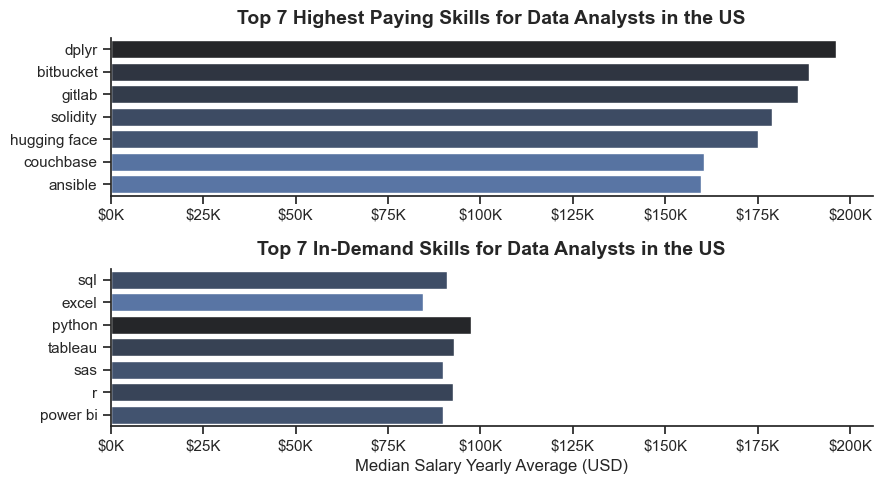

In [343]:
fig , ax = plt.subplots(2, 1)

fig.set_size_inches(9, 5)                 #setting figure size
sns.set_theme(style='ticks')
sns.barplot(data = df_top_skills_paid,
            x = 'median',
            y = 'job_skills',
            ax = ax[0],
            hue='median',
            palette='dark:b_r',
            legend=False
            )

ax[0].set_title('Top 7 Highest Paying Skills for Data Analysts in the US',
                fontsize=14,
                pad = 10,                 
                fontweight="bold",)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))

sns.barplot(data = df_top_skills_demand,
            x = 'median',
            y = 'job_skills',
            ax = ax[1],
            hue='median',
            palette='dark:b_r',
            legend=False
            )
ax[1].set_title('Top 7 In-Demand Skills for Data Analysts in the US',
                fontsize=14,
                pad = 10,                 
                fontweight="bold",)   
ax[1].set_xlabel('Median Salary Yearly Average (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))
ax[1].set_xlim(ax[0].get_xlim())

sns.despine()            #removing top and right spines

plt.tight_layout()        #adjusting subplots to fit in figure area.

plt.show()

### Insight
- The highest-paying skills are specialized and less common, such as **dplyr**, **GitLab**, and **Bitbucket**, indicating strong salary premiums for niche expertise  
- In-demand skills like **SQL**, **Excel**, and **Python** appear in far more job postings but are associated with lower median salaries  
- There is a clear gap between skills that are **most requested** and those that are **highest paid**, highlighting the value of combining foundational skills with specialized tools to maximize earning potential  
